# Numerical Integration

### Example:

Calculate the integral of:

$f(x) = \int_0^{\pi}\sin(x)\,dx$ 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import sympy as sp

## 1. Using sympy (symbolic algebra):

We can use the integrate() function to calculate both the undefined and defined integral of analytical functions:

https://docs.sympy.org/latest/modules/integrals/integrals.html


$f(x) = \int_0^{\pi}\sin(x)\,dx$ 

In [11]:
# Define symbol
x = sp.Symbol('x')

# Integral function
y = sp.integrate(sp.sin(x), x)

print(y)

-cos(x)


In [12]:
y_eval = integrate(sin(x), (x, 0, sp.pi))

print(y_eval)

2


### Plot:

In [13]:
# Vector for x
x = np.arange(0, np.pi, 0.01)

# Vector for y
y = np.sin(x)

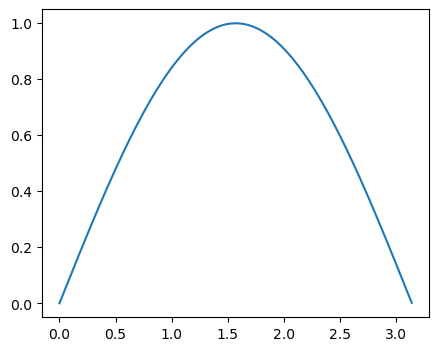

In [14]:
plt.figure(figsize=(5,4))
plt.plot(x, y)
plt.show()

## 2. Using Riemanns Integral:

We can approximate integrals by summing the area of rectangles under the curve.

The width of the rectangle is $x_{i+1} - x_i = h$, and its height is defined by the function $f(x)$ evaluated for the interval, $h$.

We have three options:

1. We can choose the left point, $x_i$, to evaluate $f(x_i)$ and get $O(h)$ for:

$$\int_a^b f(x) dx \approx \sum_{i = 0}^{n-1} hf(x_i),$$

2. We can choose the right point, $x_{i+1}$, to evaluate $f(x_{i+1})$ and get $O(h)$ for:

$$\int_a^b f(x) dx \approx \sum_{i = 1}^{n} hf(x_i),$$

3. We can choose the mid point, $x_{mid} = \frac{x_{i+1} + x_i}{2}$, to evaluate $f(x_{mid})$ and get $O(h^2)$ for:

$$\int_a^b f(x)dx \approx \sum_{i = 0}^{n-1} hf(y_i)$$

where $y_i = \frac{y_{i+1} + y_i}{2}$.

Based on: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter21.02-Riemanns-Integral.html

### 2.1. Left and right Riemann integrals:

Calculate the integral of:

$f(x) = \int_0^{\pi}\sin(x)\,dx$ 

using the Riemann left and right approximations and compare the errors to the actual value.

In [21]:
# Integration limits
x_0 = 0
x_1 = np.pi

# Number of rectangles
n = 100

# x and y vectors
x = np.linspace(x_0, x_1, n)
y = np.sin(x)

In [22]:
# Rectangle width
h = (x_1 - x_0)/(n - 1)

1. We can choose the left point, $x_i$, to evaluate $f(x_i)$ and get $O(h)$ for:

$$\int_a^b f(x) dx \approx \sum_{i = 0}^{n-1} hf(x_i),$$

2. We can choose the right point, $x_{i+1}$, to evaluate $f(x_{i+1})$ and get $O(h)$ for:

$$\int_a^b f(x) dx \approx \sum_{i = 1}^{n} hf(x_i),$$

In [23]:
# Left and right Riemann approximations:

left_riemann = h * np.sum(np.sin(x[:n-1]))

right_riemann = h * np.sum(np.sin(x[1:]))

print(left_riemann, right_riemann)

1.9998321638939927 1.9998321638939927


#### Integration errors:

In [20]:
error_left_riemann = np.abs(y_eval - left_riemann)

error_right_riemann = np.abs(y_eval - right_riemann)

print('h =', h, '\n, O_{left}= ', error_left_riemann, '\n, O_{right} =', error_right_riemann)

h = 0.3490658503988659 
, O_{left}=  0.0203491887835168 
, O_{right} = 0.0203491887835163


### 2.2. Midpoint Riemann integral

In [24]:
# Mid-point:

x_mid = (x[:n-1] + x[1:])/2

3. We can choose the mid point, $x_{mid} = \frac{x_{i+1} + x_i}{2}$, to evaluate $f(x_{mid})$ and get $O(h^2)$ for:

$$\int_a^b f(x)dx \approx \sum_{i = 0}^{n-1} hf(y_i)$$

where $y_i = \frac{y_{i+1} + y_i}{2}$.

In [25]:
# Midpint integral

midpoint_riemann = h * sum(np.sin(x_mid))
print(midpoint_riemann)

2.0000839191093345


#### Integration error:

In [26]:
error_midpoint_riemann = np.abs(y_eval - midpoint_riemann)

print(error_midpoint_riemann)

8.39191093344738e-5


In [27]:
print('h =', h**3, '\n, O_{mid} =', error_midpoint_riemann)

h = 3.195538352641796e-05 
, O_{mid} = 8.39191093344738e-5


## 3. Using the Trapezoid Rule:

Instead of rectangles, this method fits trapezoids into each subintervals, and then it sums the areas of the trapezoids to approximate the total integral.

For each subinterval along $x$, the trapezoid rule computes the area:

$h\frac{f(x_i) + f(x_{i+1})}{2}$

of a trapezoid with corners at:

1. $(x_i, 0)$

2. $(x_{i+1}, 0)$

3. $(x_i, f(x_i))$

4. $(x_{i+1}, f(x_{i+1}))$.

The Trapezoid Rule approximates integrals according to the expression:

$$\int_a^b f(x) dx \approx \sum_{i=0}^{n-1} h\frac{f(x_i) + f(x_{i+1})}{2}.$$

In [28]:
# Trapezoid area

trapezoid_1 = sum(0.5*h*(y[:n-1] + y[1:]))

print(trapezoid_1)

1.9998321638939935


The trapezoid rule "double-counts" most of the terms in the series:

\begin{eqnarray*}\sum_{i=0}^{n-1} h\frac{f(x_i) + f(x_{i+1})}{2} &=& \frac{h}{2} \left[(f(x_0) + f(x_1)) + (f(x_1) + f(x_2)) + (f(x_2)\right. \\
&&\left. + f(x_3)) + \cdots + (f(x_{n-1}) + f(x_n))\right].\end{eqnarray*}

We can be more computationally efficient using the following expression.

$$\int_a^b f(x) dx \approx \frac{h}{2} \left(f(x_0) + 2 \left(\sum_{i=1}^{n-1} f(x_i)\right) + f(x_n)\right).$$

In [29]:
# Trapezoid area
trapezoid_2 = (h/2)*(y[0] + 2 * sum(y[1:n-1]) + y[n-1])

print(trapezoid_2)

1.9998321638939924


#### Error estimation:

In [30]:
error_trapezoid = np.abs(y_eval - trapezoid_2)

print('h =', h**2, '\n, O_{trap} =', error_trapezoid)

h = 0.0010069997348320947 
, O_{trap} = 0.000167836106007568


## 4. Using Simpson's rule:

The Simpson's Rule approximates the area under $f(x)$ over these two subintervals by fitting a quadratic polynomial through the points:

1. $(x_{i-1}, f(x_{i-1}))$

2. $(x_i, f(x_i))$

3. $(x_{i+1}, f(x_{i+1}))$

which is a unique polynomial, and then integrating the quadratic exactly.

First, we construct the quadratic polynomial approximation of the function over the two subintervals. The easiest way to do this is to use Lagrange polynomials:

\begin{eqnarray*}P_i(x) &=& f(x_{i-1})\frac{(x - x_i)(x - x_{i+1})}{(x_{i-1} - x_i)(x_{i-1} - x_{i+1})} + f(x_i)\frac{(x - x_{i-1})(x - x_{i+1})}{(x_{i} - x_{i-1})(x_{i} - x_{i+1})}\\
&&+ f(x_{i+1})\frac{(x - x_{i-1})(x - x_{i})}{(x_{i+1} - x_{i-1})(x_{i+1} -
x_{i})},\end{eqnarray*}

and with substitutions for $h$ results in

$$P_i(x) = \frac{f(x_{i-1})}{2h^2} (x - x_i)(x - x_{i+1}) - \frac{f(x_i)}{h^2} (x - x_{i-1})(x - x_{i+1}) + \frac{f(x_{i+1})}{2h^2} (x - x_{i-1})(x - x_{i}).$$

You can confirm that the polynomial intersects the desired points. With some algebra and manipulation, the integral of $P_i(x)$ over the two subintervals is

$$\int_{x_{i-1}}^{x_{i+1}} P_i(x) dx = \frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1}).$$

To approximate the integral over $(a, b)$, we must sum the integrals of $P_i(x)$ over every *two* subintervals since $P_i(x)$ spans two subintervals. Substituting $\frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1}))$ for the integral of $P_i(x)$ and regrouping the terms for efficiency leads to the formula

$$\int_a^b f(x) dx \approx \frac{h}{3} \left[f(x_0)+4 \left(\sum_{i=1, i\  {\text{odd}}}^{n-1}f(x_i)\right)+2 \left(\sum_{i=2, i\  {\text{even}}}^{n-2}f(x_i)\right)+f(x_n)\right].$$

Note that to use Simpson's Rule, we **must** have an even number of intervals and, therefore, an odd number of grid points.

In [36]:
simpson = (h/3) * (y[0] + 4*sum(y[1:n-1:2]) + 2*sum(y[:n-2:2]) + y[n-1])

print(simpson)

1.9991609434038167


#### Error estimation:

In [34]:
error_simpson = np.abs(y_eval - simpson)

print('h =', h**3, ', O_{simpson} =', error_simpson)

h = 3.195538352641796e-05 , O_{simpson} = 0.000839056596183330
